# Imports

In [2]:
#importing the nx library
import networkx as nx
import matplotlib.pyplot as plt
import random
import json

COLOR_BG = "#a8dadc"
COLOR_FG = "#457b9d"

SIZE_BG_NODES = 800
SIZE_FG_NODES = 2400

EDGE_BG_WEIGHT = 4
EDGE_FG_WEIGHT = 24

MATRIX_SIDE = 10
NO_FG_NODES = 20

FIG_SIZE = (12, 12)

# Activity 2

## 2.1 Sub-activity: Graph creation


### Task 1

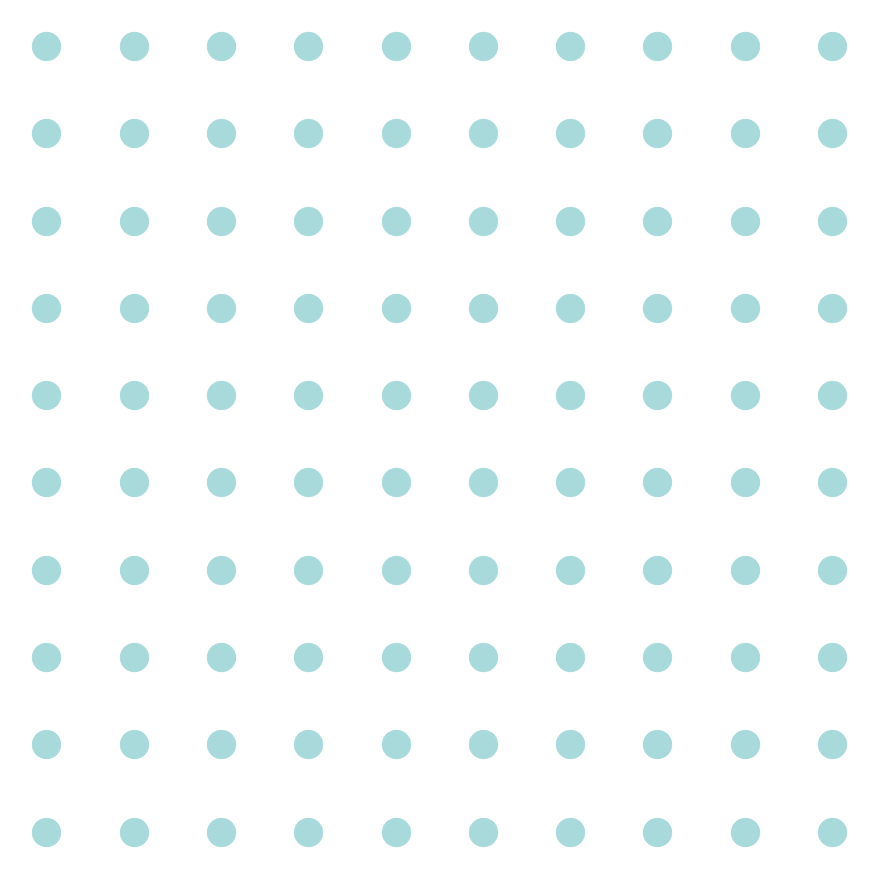

In [8]:
#creating a simple graph
G = nx.Graph() 

#adding nodes
#i and j notations specifies the ID of the node
for i in range(MATRIX_SIDE):
    for j in range(MATRIX_SIDE):
        G.add_node((i, j), color = COLOR_BG, node_type="bg")
#this library allows you to create any property and feed it with any values
#you want

#plotting
#pos is a dictionary used to set the position (pattern) of the nodes
pos = {(x,y):(y,-x) for x,y in G.nodes()}
plt.figure(figsize = FIG_SIZE)
#pos argument take a dictionary as a value, it takes the ID
nx.draw(G, pos=pos, node_color=COLOR_BG, node_size=SIZE_BG_NODES)

### Task 2

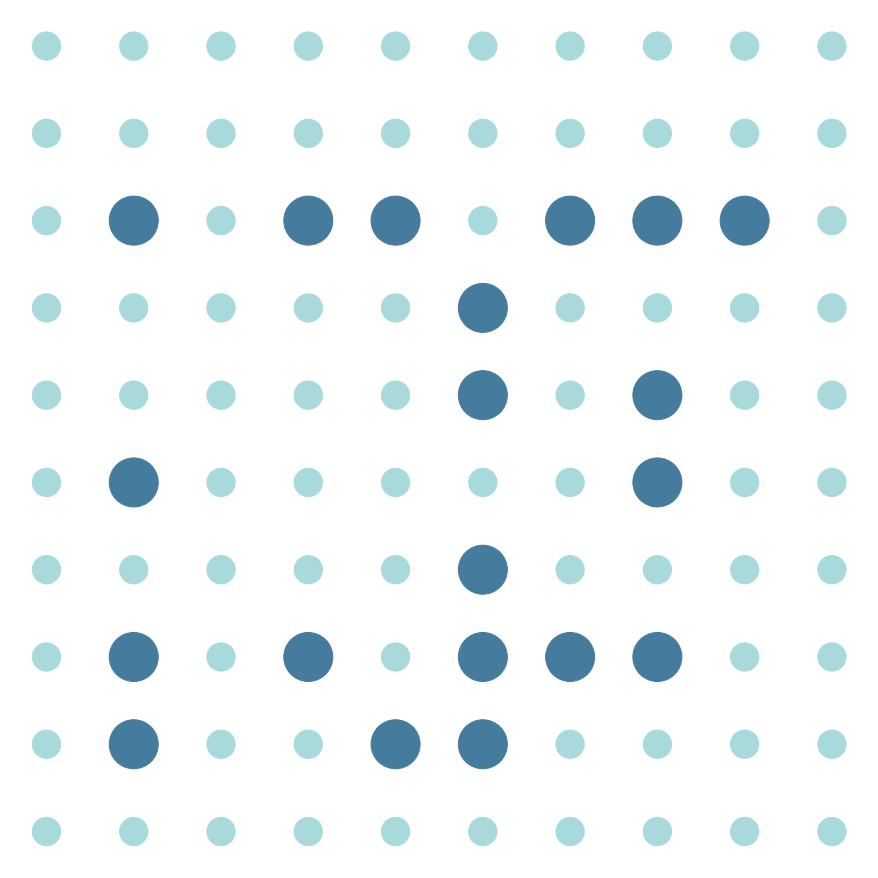

In [9]:
#creating random FG nodes

'''
please note: run the cell only once, because running it multiple times it will randomly select
#other nodes and set them to foregrounds resulting in more than 20 foregrounds, which 
#we don't want 

'''

#looping until the size of the list is less than 20
#randomly creating in the range of the matrix ignoring first row and last column
#as well as first column and last column
fg_nodes = []
while(len(fg_nodes) != NO_FG_NODES):
    node = (random.randrange(1, MATRIX_SIDE-1), random.randrange(1, MATRIX_SIDE-1))
    #append only if the node does not exist already in fg nodes
    if node not in fg_nodes:
        fg_nodes.append(node)

#set the colour attribute to COLOUR FG
#set the node type attribute to FG
nx.set_node_attributes(G, {node: COLOR_FG for node in fg_nodes}, 'color')
nx.set_node_attributes(G, {node: "fg" for node in fg_nodes}, 'node_type')

#based on the node attribute, it also defines the colour properties of the node
#and that nx.get_node.
color_map = nx.get_node_attributes(G, 'color').values()
type_map = nx.get_node_attributes(G, 'node_type')
#this statement is deciding which node should be placed in the appropriate list based
#on the type of the node
size_map = [SIZE_FG_NODES if type_map[node] == 'fg' else SIZE_BG_NODES for node in G.nodes()]

#plotting
pos = {(x,y):(y,-x) for x,y in G.nodes()}
plt.figure(figsize = FIG_SIZE)
nx.draw(G, pos=pos, node_color=color_map, node_size=size_map)

### Task 3

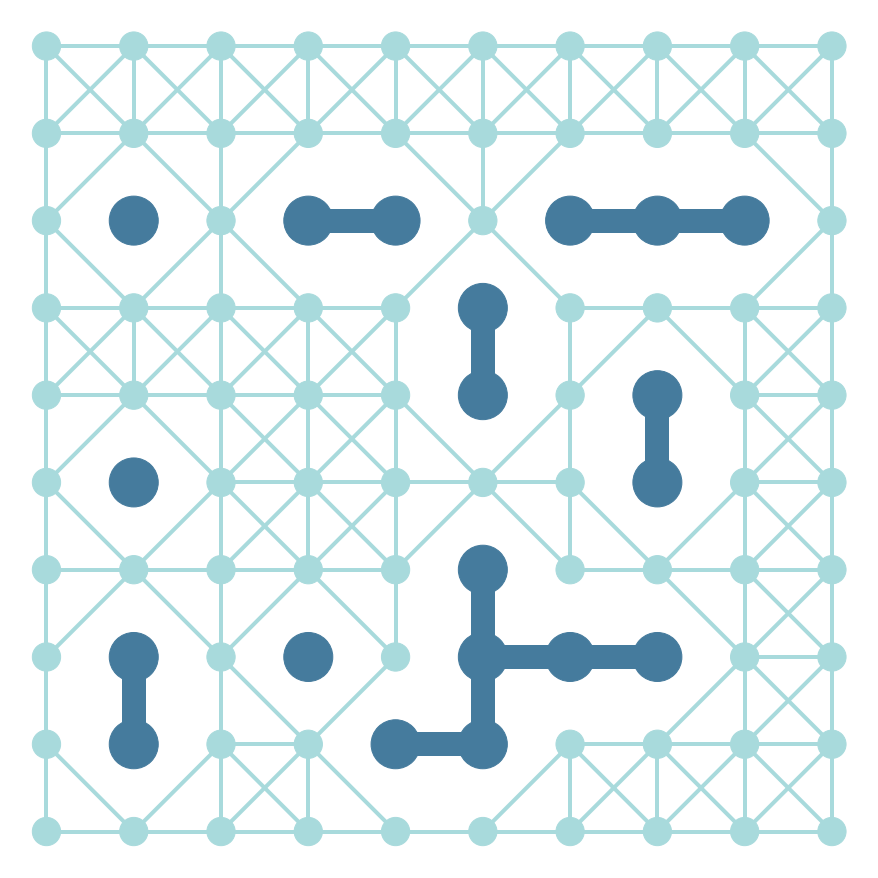

In [13]:
#ddding edges to foreground nodes
#fg_moves represents all the relationships of a node in terms of coordinates 
#with the neighbours
fg_moves = [(0, 1), (1, 0), (-1, 0), (0, -1)]

#extracting all the foreground nodes
all_fg_nodes = [node for node in type_map if type_map[node] == 'fg']

#looping for all foreground nodes
for node in all_fg_nodes:
    #for every single foreground, we are checking for neighbours
    #we apply the moves, and see if the move brings us to another foreground node
    for i in range(len(fg_moves)):
        next_node = (node[0]+fg_moves[i][0], node[1]+fg_moves[i][1])
        #if the next node is in the foreground node, only then add the edge
        if next_node in all_fg_nodes:
            G.add_edge(node, next_node, color = COLOR_FG, weight = EDGE_FG_WEIGHT)
            
bg_moves = [(0, 1), (1, 0), (-1, 0), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1)]

#adding edges to background nodes
#for the most of the code, this block is the same
for node in G.nodes():
    for i in range(len(bg_moves)):
        next_node = (node[0]+bg_moves[i][0], node[1]+bg_moves[i][1])
        #in the if statement, we are checking if the next node is part of g_nodes or not (basically if
        #the node exists or not), we are checking because a node could be in the edges to the point
        #where there might not be any possible to connect with
        if next_node in G.nodes() and node not in all_fg_nodes and next_node not in all_fg_nodes:
            G.add_edge(node, next_node, color = COLOR_BG, weight = EDGE_BG_WEIGHT)
            
#setting the attributes
color_map = nx.get_node_attributes(G, 'color').values()
type_map = nx.get_node_attributes(G, 'node_type')
size_map = [SIZE_FG_NODES if type_map[node] == 'fg' else SIZE_BG_NODES for node in G.nodes()]
#extracting edge colour based on the edge attributes
edge_color_map = nx.get_edge_attributes(G, 'color').values()
width_map = nx.get_edge_attributes(G, 'weight').values()

# plotting
pos = {(x,y):(y,-x) for x,y in G.nodes()}
plt.figure(figsize = FIG_SIZE)
nx.draw(G, pos=pos, node_color=color_map, node_size=size_map, edge_color=edge_color_map, width=list(width_map))

## 2.2 Sub-activity: Graph manipulation and output

### Task 4

In [14]:
#info tell us how many nodes and edges a particular node has
#ratio of the edges in the graph to the maximum possible number of edges it could have4
#the degree of centrality are properties which define how centrally connected an edge is based on the 
#node around
print("Info of Graph:", nx.info(G))
print()
print("Density of Graph:", nx.density(G))
print()
print("Degree Centrality of Graph:", nx.algorithms.centrality.degree_centrality(G))

Info of Graph: Name: 
Type: Graph
Number of nodes: 100
Number of edges: 210
Average degree:   4.2000

Density of Graph: 0.04242424242424243

Degree Centrality of Graph: {(0, 0): 0.030303030303030304, (0, 1): 0.05050505050505051, (0, 2): 0.05050505050505051, (0, 3): 0.05050505050505051, (0, 4): 0.05050505050505051, (0, 5): 0.05050505050505051, (0, 6): 0.05050505050505051, (0, 7): 0.05050505050505051, (0, 8): 0.05050505050505051, (0, 9): 0.030303030303030304, (1, 0): 0.04040404040404041, (1, 1): 0.07070707070707072, (1, 2): 0.06060606060606061, (1, 3): 0.06060606060606061, (1, 4): 0.06060606060606061, (1, 5): 0.06060606060606061, (1, 6): 0.06060606060606061, (1, 7): 0.05050505050505051, (1, 8): 0.06060606060606061, (1, 9): 0.04040404040404041, (2, 0): 0.04040404040404041, (2, 1): 0.0, (2, 2): 0.06060606060606061, (2, 3): 0.010101010101010102, (2, 4): 0.010101010101010102, (2, 5): 0.05050505050505051, (2, 6): 0.010101010101010102, (2, 7): 0.020202020202020204, (2, 8): 0.010101010101010102

### Task 5

In [16]:
#this is converting the edge/nodes data into JSON format using json.dump
#the name given to the file is json.data as it was not specified
data = nx.readwrite.json_graph.node_link_data(G)
with open('data.json', 'w') as f:
    json.dump(data, f)